# Py Learn Data Course

In [1]:
from pathlib import Path
import json
import csv
import time
import re

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

## Configuration

In [3]:
data_folder = Path().cwd().parent / 'data' / 'house_pricing'

csv_file = data_folder / 'python-panama-real-estate.csv'

print(f'Folder {data_folder} existe: {data_folder.exists()}')
print(f'CSv file: {csv_file.name}')

Folder /home/luiscberrocal/PycharmProjects/pylearn-data-101/data/house_pricing existe: True
CSv file: python-panama-real-estate.csv


## Loading data

### Normal load

In [4]:
df = pd.read_csv(csv_file)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   status                    733159 non-null  object 
 1   price                     733088 non-null  float64
 2   bed                       617177 non-null  float64
 3   bath                      621407 non-null  float64
 4   Lot area (acres)          572378 non-null  float64
 5   Full Address              733159 non-null  object 
 6   street                    732069 non-null  object 
 7   city                      733087 non-null  object 
 8   state                     705907 non-null  object 
 9   Zip code                  732957 non-null  float64
 10  House size (square feet)  520772 non-null  float64
 11  sold_date                 347237 non-null  object 
 12  shootings_count           293781 non-null  float64
 13  bath_tub                  0 non-null       f

### PyArrow load

In [6]:
df = pd.read_csv(csv_file, engine='pyarrow', dtype_backend='pyarrow')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype               
---  ------                    --------------   -----               
 0   status                    733159 non-null  category            
 1   price                     733088 non-null  double[pyarrow]     
 2   bed                       617177 non-null  double[pyarrow]     
 3   bath                      621407 non-null  double[pyarrow]     
 4   Lot area (acres)          572378 non-null  double[pyarrow]     
 5   Full Address              733159 non-null  string[pyarrow]     
 6   street                    733159 non-null  string[pyarrow]     
 7   city                      733159 non-null  category            
 8   state                     733159 non-null  category            
 9   Zip code                  732957 non-null  category            
 10  House size (square feet)  520772 non-null  double[pyarro

#### Setting categories

In [14]:
df['city'] = df['city'].astype('category')
df['state'] = df['state'].astype('category')
df['Zip code'] = df['Zip code'].astype('category')
df['status'] = df['status'].astype('category')

In [15]:
df['status'].value_counts()

status
for_sale          731566
ready_to_build      1593
Name: count, dtype: int64

## Exploración de datos

### Shape

In [18]:
print(f'Filas {df.shape[0]:,} Columnas: {df.shape[1]}')

Filas 733,159 Columnas: 14


### Head

In [17]:
df.head()

,status,price,bed,bath,Lot area (acres),Full Address,street,city,state,Zip code,House size (square feet),sold_date,shootings_count,bath_tub
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,,601.0,920.0,<NA>,<NA>,<NA>
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,,601.0,1527.0,<NA>,<NA>,<NA>
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,,795.0,748.0,<NA>,<NA>,<NA>
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,,731.0,1800.0,<NA>,<NA>,<NA>
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,,680.0,<NA>,<NA>,<NA>,<NA>


### Describe

In [19]:
df.describe()

,price,bed,bath,Lot area (acres),House size (square feet),sold_date,shootings_count
count,7.330880e+05,617177.000000,621407.000000,572378.000000,5.207720e+05,347237,293781.000000
mean,7.257017e+05,3.422041,2.540473,19.058585,2.192527e+03,2008-11-08,4.788407
min,0.000000e+00,1.000000,1.000000,0.000000,1.000000e+02,1901-01-01,1.000000
25%,2.375000e+05,2.000000,2.000000,0.140000,1.195000e+03,2002-08-26,1.000000
50%,4.190000e+05,3.000000,2.000000,0.350000,1.714000e+03,2009-07-22,3.000000
75%,7.250000e+05,4.000000,3.000000,1.380000,2.547250e+03,2017-10-12,7.000000
max,8.750000e+08,123.000000,198.000000,100000.000000,1.450112e+06,2023-03-01,36.000000
std,1.768769e+06,2.028735,2.002442,1022.007111,3.141461e+03,NaN,5.367337


### Histogramas

<Axes: >

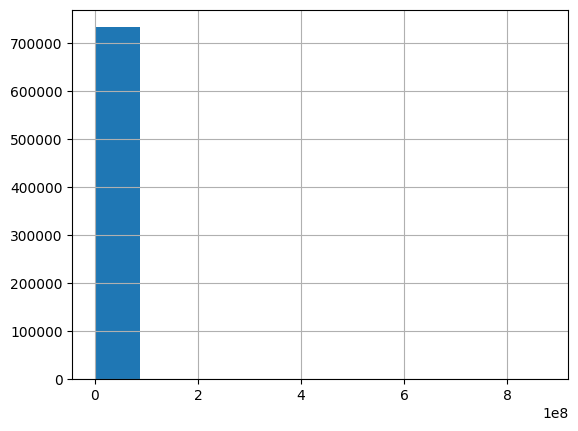

In [22]:
df['price'].hist(bins=10)

<Axes: >

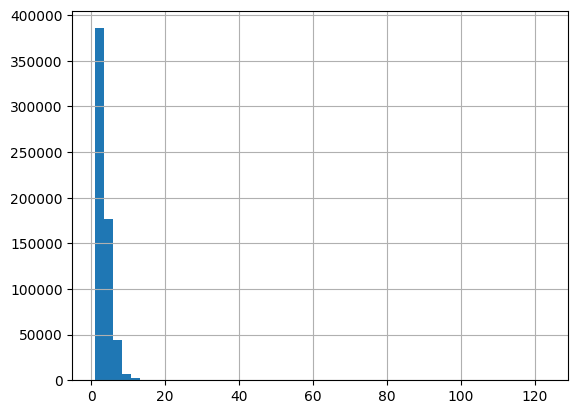

In [24]:
df['bed'].hist(bins=50)

### Valores Nulos

In [20]:
df.isna().sum()

status                           0
price                           71
bed                         115982
bath                        111752
Lot area (acres)            160781
Full Address                     0
street                           0
city                             0
state                            0
Zip code                       202
House size (square feet)    212387
sold_date                   385922
shootings_count             439378
bath_tub                    733159
dtype: int64

## Limpieza de datos

### Camas

In [29]:
bed_mean = df['bed'].mean()
bed_std = df['bed'].std()

print(f'Promedio: {bed_mean:.2f} Desviacion standard {bed_std:.2f}')
outliers = bed_mean + 3 * bed_std

print(f'Outliers: +/- {outliers:.2f}')

Promedio: 3.42 Desviacion standard 2.03
Outliers: +/- 9.51


In [30]:
beds = df.loc[df['bed'] >= outliers]

print(beds.shape)

(6651, 14)


In [31]:
beds['bed'].describe()

count    6651.000000
mean       13.831454
std         8.738370
min        10.000000
25%        10.000000
50%        12.000000
75%        14.000000
max       123.000000
Name: bed, dtype: double[pyarrow]

In [32]:
df = df.drop(beds.index)

<Axes: >

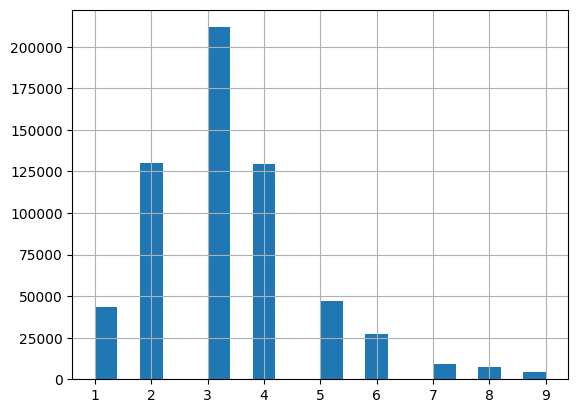

In [37]:
df['bed'].hist(bins=20)

### Banos

In [36]:
df['bath'].describe()

count    614830.000000
mean          2.478714
std           1.364895
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          29.000000
Name: bath, dtype: double[pyarrow]

In [38]:
bath_mean = df['bath'].mean()
bath_std = df['bath'].std()

print(f'Promedio: {bath_mean:.2f} Desviacion standard {bath_std:.2f}')
bath_outliers = bath_mean + 3 * bath_std

print(f'Outliers: +/- {bath_outliers:.2f}')

Promedio: 2.48 Desviacion standard 1.36
Outliers: +/- 6.57


In [39]:
baths = df.loc[df['bath'] >= outliers]

print(baths.shape)

(1687, 14)


In [40]:
baths['bath'].describe()

count    1687.000000
mean       11.548903
std         2.585400
min        10.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        29.000000
Name: bath, dtype: double[pyarrow]

In [41]:
df = df.drop(baths.index)

<Axes: >

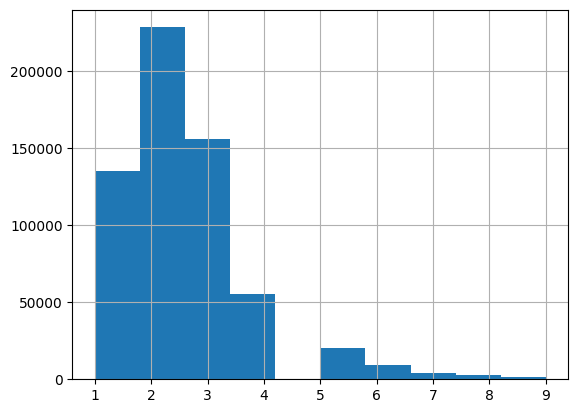

In [43]:
df['bath'].hist(bins=10)

### Precio

#### Valores extremos

In [47]:
df['price'].describe()

count    7.247110e+05
mean     6.938631e+05
std      1.637554e+06
min      1.000000e+00
25%      2.350000e+05
50%      4.100000e+05
75%      7.099000e+05
max      8.750000e+08
Name: price, dtype: double[pyarrow]

In [52]:
price_mean = df['price'].mean()
price_std = df['price'].std()

print(f'Promedio: {price_mean:,.2f} Desviacion standard {price_std:,.2f}')
price_outliers = price_mean + 3 * price_std

print(f'Outliers: +/- {price_outliers:,.2f}')

Promedio: 693,863.10 Desviacion standard 1,637,554.02
Outliers: +/- 5,606,525.15


In [53]:
extreme = df.loc[df['price'] >= price_outliers]

extreme.shape

(6736, 14)

In [54]:
df = df.drop(extreme.index)

df.shape

(718046, 14)

<Axes: >

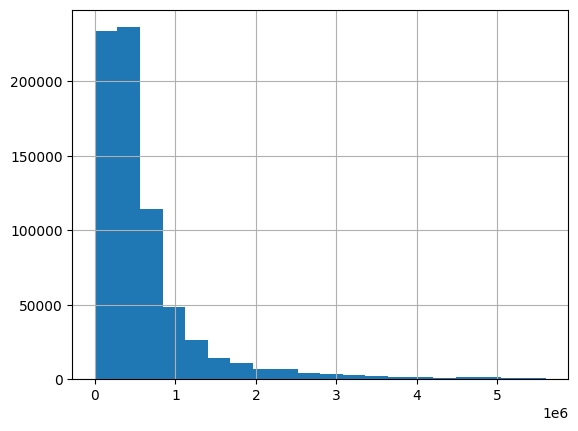

In [56]:
df['price'].hist(bins=20)